In [1]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
import pyrosetta
import os

/usr/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pyrosetta.init('-out:level 0')

Found rosetta database at: /usr/lib/python3.5/site-packages/pyrosetta-4.0-py3.5-linux-x86_64.egg/pyrosetta/database; using it....
PyRosetta-4 2016 [Rosetta 2016 unknown:ebee9f505da801d17837b6e348f870db27cc9d74 2017-07-21 21:38:58 -0700] retrieved from: git@github.com:RosettaCommons/main.git
(C) Copyright Rosetta Commons Member Institutions.
Created in JHU by Sergey Lyskov and PyRosetta Team.



In [3]:
target_protein = '1zdd'
pose = pyrosetta.Pose()

In [4]:
targets = []
for root, directories, filenames in os.walk('.'):
    for filename in filenames: 
        p = os.path.join(root,filename)
        if 'pdb' in p and target_protein in p and 'repacked' not in p and 'test_mc_bugfree' in p:
            targets.append(p)
            
print(len(targets))

160


In [5]:
angle_phi = []
angle_psi = []
angle_omega = []

types = {}

for k, t in enumerate(targets):       
    pose = pyrosetta.pose_from_file(t)    
    aphi = {}
    apsi = {}
    aomega = {}
    
    label = t.split('/')[3]
    
    aphi['type'] = label
    apsi['type'] = label
    aomega['type'] = label
    
    if label not in types.keys():
        types[label] = len(types)
    
    for i in range(1, pose.total_residue() + 1):           
        phi = pose.phi(i)
        psi = pose.psi(i)
        omega = pose.omega(i)
        
        aphi[i] = phi
        apsi[i] = psi
        aomega[i] = omega if omega > 0 else omega + 360
                
    angle_phi.append(aphi)
    angle_psi.append(apsi)
    angle_omega.append(aomega)
    
    if k % 10 == 0 or k >= len(targets) - 1:
        print("%6.2f%%" % (k / (len(targets) - 1) * 100.0))

  0.00%
  6.29%
 12.58%
 18.87%
 25.16%
 31.45%
 37.74%
 44.03%
 50.31%
 56.60%
 62.89%
 69.18%
 75.47%
 81.76%
 88.05%
 94.34%
100.00%


In [6]:
df_phi = pd.DataFrame(angle_phi)
df_psi = pd.DataFrame(angle_psi)
df_omega = pd.DataFrame(angle_omega)

In [7]:
sorted_keys_ = list(sorted(filter(lambda x:type(x) != type(str()), df_phi.columns)))
sorted_keys = ['type'] + sorted_keys_

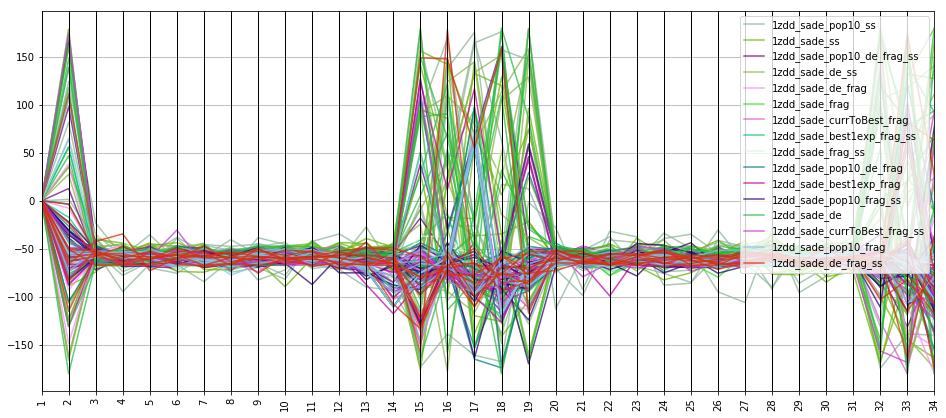

In [14]:
plt.figure(figsize=(16, 7))

#ax = pd.plotting.andrews_curves(df_psi[sorted_keys], 'type')
ax = pd.plotting.parallel_coordinates(df_phi[sorted_keys], 'type', alpha=0.75)
plt.xticks(rotation=90);

In [ ]:
rndperm = np.random.permutation(df_psi[sorted_keys_].shape[0])

data = df_psi[sorted_keys_].values
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 160 samples in 0.000s...
[t-SNE] Computed neighbors for 160 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 160 / 160
[t-SNE] Mean sigma: 47.036620
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.328674


In [ ]:
df_tsne = df_psi[sorted_keys_].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.8) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [11]:
for d in data:
    print(d)

[  94.11597869 -158.32687256  -49.83646157  -45.33391802  -40.35822327
  -60.95457378  -49.54294952  -44.57347343  -63.00177414  -45.12178931
  -35.14621539  -46.20640185  -40.91523971  -41.41519252   33.01609276
  -43.54455612 -149.42045829 -112.10539383 -132.31765386  -75.20043873
  -86.3679855   -51.99951795  -24.2840146   -38.01270266  -61.9524571
  -67.89613982  -48.89350402  -31.25039167  -46.26301046  -46.63573699
  -27.51361198  -19.46154647   66.20427052    0.        ]
[  86.01299143  170.23290386  -43.82543846  -58.6086178   -58.48774086
  -55.05935557  -32.70871011  -66.74940762  -54.0787015   -51.54826552
  -56.21188802  -39.70290717  -31.54478143  -31.84441338  -30.00329422
   -1.36098096   88.79676913 -110.81420834   20.78032276  -44.79776057
  -53.32638315  -61.11986897  -44.11007991  -45.85364798  -57.25499385
  -39.2471778   -61.60504204  -31.51934747  -36.70376665  -45.943039
  -22.56847755  129.50871766   -1.36271018    0.        ]
[ -17.5671522    97.17665435  -67.3